In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from statistics import mean 

C:\Users\RACH0_000\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.0.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
FILE_PATH = 'data/exp1_main.json'
all_entries = []
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries.append(entry)
        e = entry['data']
len(all_entries)

2005

In [3]:
start = []
finish = []
for entry in all_entries:
    if isinstance(entry['data'], dict):
        condition = entry['data']
        start.append(entry)
    else:
        condition = entry['data'][0]
        finish.append(entry)
print(len(start),len(finish))

def return_indices(user_order): #function that searches through the list of anagrams and returns the indices of the anagrams seen by the subject
    order = ['TEH', 'WYH', 'CPA', 'YSE', 'CPU','FNU', 'EEY', 'SNU', 'HTA', 'CNA', 'HTE', 'HWY', 'APC', 'EYS', 'PCU', 'NUF', 'YEE', 'UNS', 'AHT', 'ACN', 'WODR', 'DDEE', 'BLLE', 'STRO', 'PTIN', 'BTEL', 'CADR', 'FNDI', 'YLEL', 'CDOL','OWDR', 'EDDE', 'LBLE', 'TOSR', 'TIPN', 'TBLE', 'RADC', 'DIFN', 'LYLE','DOCL', 'VENGA','CLREK','PEOKR','OSIAS','GIATN','OUIPM','DONRO','PHNEO','ECELT','SCELA', 'EVANG', 'KLECR','KOERP','SAOSI','IGNAT','POUIM','OONRD','NPOHE','TELCE','ESALC', 'SADOWH','DOLRLA','RAODNM','SALYRA','WEIGTH','RDFUNE','LEETTR','CRABON','WIZRAD','BLLAET', 'HSOADW', 'RODLLA','MARNOD','AALRYS','IEGWHT','UEFNDR','RETLET','NCRBOA','ZIAWRD','EABLLT', 'CLEIMAT','JWAYALK','HAKMOCM','DURAELB','NAYUGHT','GLICAER','JLUMBED','EXPLIAN','GBRAAGE','JNOUREY', 'TCILAME','AYKAWLJ','CAMHOMK','EURADBL','AYUGNHT','CLAIGER','LUBMEJD','AXPLINE','BARAGGE','YUOEJRN']
    idx = []
    for i in range(len(user_order)):
        idx.append(order.index(user_order[i]))
    return idx

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    #print(a)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

1074 931


In [15]:
#get subject data for the 100 anagrams

time_guess = [[] for i in range(100)] 
actual_rt = [[] for i in range(100)]
give_up = [[] for i in range(100)]
aha = [[] for i in range(100)]

for entry in finish: 
    entry_data = entry['data']
    idx = return_indices((entry_data[0]['anagrams_seen'])) #get the indices of the anagrams seen by the subject
    anagrams_answers = entry_data[0]['anagrams_answers']
    
    counter = 3 #3 is first time quiz is given to subjects
    while '5' not in entry_data[counter]['responses']: #keep increasing counter everytime subject gets the quiz incorrectly
        counter = counter+2
    
    for j in range(5):
        counter = counter+3
        time_guess[idx[j]].append(entry_data[counter]['response'])

        counter = counter+1  
        rt = entry_data[counter]['rt']
        attempt = entry_data[counter]['responses'] 
        g = 0

        while anagrams_answers[j].lower() not in attempt.lower(): #keep incrementing until person gets correct answer or gives up
            if "next" in attempt.lower(): #break if person gave up
                g = 1
                break
            else:                
                counter = counter+1
                attempt = entry_data[counter]['responses']
                rt = rt+entry_data[counter]['rt']  

        give_up[idx[j]].append(g) #did subject give up or not
        actual_rt[idx[j]].append(rt) #append actual time to complete

        counter = counter+1    
        r = entry_data[counter]['responses'] #aha rating
        aha[idx[j]].append(int(r[6]))

#print(time_guess, actual_rt, aha)
        

In [19]:
#data conversion, clean-up, and storage here
anagrams = order = ['TEH', 'WYH', 'CPA', 'YSE', 'CPU','FNU', 'EEY', 'SNU', 'HTA', 'CNA', 'HTE', 'HWY', 'APC', 'EYS', 'PCU', 'NUF', 'YEE', 'UNS', 'AHT', 'ACN', 'WODR', 'DDEE', 'BLLE', 'STRO', 'PTIN', 'BTEL', 'CADR', 'FNDI', 'YLEL', 'CDOL','OWDR', 'EDDE', 'LBLE', 'TOSR', 'TIPN', 'TBLE', 'RADC', 'DIFN', 'LYLE','DOCL', 'VENGA','CLREK','PEOKR','OSIAS','GIATN','OUIPM','DONRO','PHNEO','ECELT','SCELA', 'EVANG', 'KLECR','KOERP','SAOSI','IGNAT','POUIM','OONRD','NPOHE','TELCE','ESALC', 'SADOWH','DOLRLA','RAODNM','SALYRA','WEIGTH','RDFUNE','LEETTR','CRABON','WIZRAD','BLLAET', 'HSOADW', 'RODLLA','MARNOD','AALRYS','IEGWHT','UEFNDR','RETLET','NCRBOA','ZIAWRD','EABLLT', 'CLEIMAT','JWAYALK','HAKMOCM','DURAELB','NAYUGHT','GLICAER','JLUMBED','EXPLIAN','GBRAAGE','JNOUREY', 'TCILAME','AYKAWLJ','CAMHOMK','EURADBL','AYUGNHT','CLAIGER','LUBMEJD','AXPLINE','BARAGGE','YUOEJRN']
mean_time_guess = []
mean_rt = []
mean_tpe = []
mean_aha = []

for i in range(100): #go through all 100 anagrams here
    give_up_i = give_up[i]
    aha_i = aha[i]    
    time_guess_i = np.asarray(time_guess[i], dtype='float64')*(3/100)*(60) 
    actual_rt_i = np.asarray(actual_rt[i], dtype='float64')*0.001  
    tpe_i = time_guess_i-actual_rt_i 
        
    indexes = [i for i,x in enumerate(give_up_i) if x == 0] #only get subjects who solved the anagram 

    aha_i = np.asarray(aha_i)
    aha_i = aha_i[np.asarray(indexes)] 
    time_guess_i = time_guess_i[np.asarray(indexes)] 
    actual_rt_i = actual_rt_i[np.asarray(indexes)] 
    tpe_i = tpe_i[np.asarray(indexes)]
    
    #indexes1 = [i for i,x in enumerate(tpe_i) if x/60 <= 0.2 and x/60 >= -0.2]
    indexes = [i for i,x in enumerate(tpe_i) if x/60 >= 1.0]
    #indexes = [i for i,x in enumerate(time_guess_i) if x/60 >= 1.0 and x/60 <= 3.0]
    #indexes = list(set(indexes1) & set(indexes2))
    if not indexes:
        continue
    else:
        aha_i = np.asarray(aha_i)
        aha_i = aha_i[np.asarray(indexes)] 
        time_guess_i = time_guess_i[np.asarray(indexes)] 
        actual_rt_i = actual_rt_i[np.asarray(indexes)] 
        tpe_i = tpe_i[np.asarray(indexes)]

        mean_time_guess.append(np.mean(time_guess_i/60))
        mean_rt.append(np.mean(actual_rt_i/60))
        mean_tpe.append(np.mean(tpe_i/60))
        mean_aha.append(np.mean(aha_i))
        #print('Time guess:', np.mean(time_guess_i), 'Actual RT:',np.mean(actual_rt_i), 'TPE:', np.mean(tpe_i), 'AHA:',np.mean(aha_i), 'numSubs:', len(aha_i))
        print('Anagram:', anagrams[i], 'numSubs:', len(aha_i))
    

    


Anagram: TEH numSubs: 4
Anagram: WYH numSubs: 3
Anagram: CPA numSubs: 3
Anagram: YSE numSubs: 3
Anagram: CPU numSubs: 2
Anagram: FNU numSubs: 6
Anagram: EEY numSubs: 1
Anagram: SNU numSubs: 8
Anagram: HTA numSubs: 1
Anagram: CNA numSubs: 4
Anagram: HTE numSubs: 6
Anagram: HWY numSubs: 2
Anagram: APC numSubs: 4
Anagram: EYS numSubs: 3
Anagram: PCU numSubs: 2
Anagram: YEE numSubs: 3
Anagram: UNS numSubs: 2
Anagram: AHT numSubs: 4
Anagram: ACN numSubs: 2
Anagram: WODR numSubs: 6
Anagram: DDEE numSubs: 4
Anagram: BLLE numSubs: 6
Anagram: STRO numSubs: 6
Anagram: PTIN numSubs: 8
Anagram: BTEL numSubs: 7
Anagram: CADR numSubs: 5
Anagram: FNDI numSubs: 6
Anagram: YLEL numSubs: 7
Anagram: CDOL numSubs: 6
Anagram: OWDR numSubs: 3
Anagram: EDDE numSubs: 5
Anagram: LBLE numSubs: 3
Anagram: TOSR numSubs: 5
Anagram: TIPN numSubs: 3
Anagram: TBLE numSubs: 5
Anagram: RADC numSubs: 6
Anagram: DIFN numSubs: 6
Anagram: LYLE numSubs: 11
Anagram: DOCL numSubs: 3
Anagram: VENGA numSubs: 6
Anagram: CLREK nu

In [20]:
print(np.corrcoef(mean_tpe, mean_aha))
print(np.corrcoef(mean_rt, mean_aha))
print(np.corrcoef(mean_rt, mean_tpe))
print(np.corrcoef(mean_time_guess, mean_tpe))
print(np.corrcoef(mean_time_guess, mean_aha))

print(np.mean(mean_aha))
print(np.std(mean_aha))

[[1.         0.15363259]
 [0.15363259 1.        ]]
[[1.         0.15365525]
 [0.15365525 1.        ]]
[[ 1.         -0.14639877]
 [-0.14639877  1.        ]]
[[1.         0.85463674]
 [0.85463674 1.        ]]
[[1.         0.22375632]
 [0.22375632 1.        ]]
3.899869206682932
0.7754540195087921


[(-0.3, 0.3)]

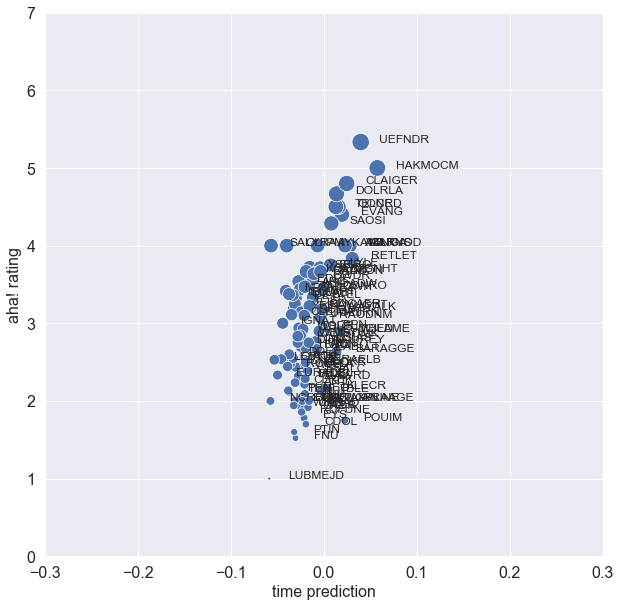

In [10]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
n = 16
plt.rcParams.update({'font.size': n})
sns.set()

df = pd.DataFrame({'anagrams': ['TEH', 'WYH', 'CPA', 'YSE', 'CPU','FNU', 'EEY', 'SNU', 'HTA', 'CNA', 'HTE', 'HWY', 'APC', 'EYS', 'PCU', 'NUF', 'YEE', 'UNS', 'AHT', 'ACN', 'WODR', 'DDEE', 'BLLE', 'STRO', 'PTIN', 'BTEL', 'CADR', 'FNDI', 'YLEL', 'CDOL','OWDR', 'EDDE', 'LBLE', 'TOSR', 'TIPN', 'TBLE', 'RADC', 'DIFN', 'LYLE','DOCL', 'VENGA','CLREK','PEOKR','OSIAS','GIATN','OUIPM','DONRO','PHNEO','ECELT','SCELA', 'EVANG', 'KLECR','KOERP','SAOSI','IGNAT','POUIM','OONRD','NPOHE','TELCE','ESALC', 'SADOWH','DOLRLA','RAODNM','SALYRA','WEIGTH','RDFUNE','LEETTR','CRABON','WIZRAD','BLLAET', 'HSOADW', 'RODLLA','MARNOD','AALRYS','IEGWHT','UEFNDR','RETLET','NCRBOA','ZIAWRD','EABLLT', 'CLEIMAT','JWAYALK','HAKMOCM','DURAELB','NAYUGHT','GLICAER','JLUMBED','EXPLIAN','GBRAAGE','JNOUREY', 'TCILAME','AYKAWLJ','CAMHOMK','EURADBL','AYUGNHT','CLAIGER','LUBMEJD','AXPLINE','BARAGGE','YUOEJRN'],
    'tpe': mean_tpe,
    'aha': mean_aha,
    'estimate': mean_time_guess,
     'rt':  mean_rt})

sns_plot = sns.scatterplot('tpe', 'aha', size="aha", sizes=(10, 300), legend=False, data=df)
label_point(df['tpe'], df['aha'], df['anagrams'] , plt.gca()) #function to label point in scatter plot
plt.gcf().set_size_inches(10, 10)
plt.tick_params(labelsize=n)
plt.xlabel(xlabel='time prediction', size=n)
plt.ylabel(ylabel='aha! rating', size=n)
sns_plot.set(ylim=(0, 7))
sns_plot.set(xlim=(-0.3, 0.3))

In [11]:
# regression analysis

df = pd.DataFrame({
    'tpe': mean_tpe,
    'aha': mean_aha,
    'estimate': mean_time_guess,
     'rt':  mean_rt})

from scipy import stats
import statsmodels.api as sm


all_predictors = ['estimate']
X = df[all_predictors]
y = mean_aha
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     26.29
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.48e-06
Time:                        16:36:16   Log-Likelihood:                -114.64
No. Observations:                 100   AIC:                             233.3
Df Residuals:                      98   BIC:                             238.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6121      0.096     27.115      0.000       2.421       2.803
estimate       2.1511      0.420      5.127      0.000       1.319       2.984
==============================================================================
Omnibus:                        1.690   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.738
Skew:                           0.290   Prob(JB):                        0.419
Kurtosis:                       2.717   Cond. No.                         5.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""